In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [63]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [64]:
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [65]:
data.insert(0,'ones',1)

In [66]:
X = data.iloc[:,0:2]
y = data.iloc[:,2:]

In [67]:
m = len(y)

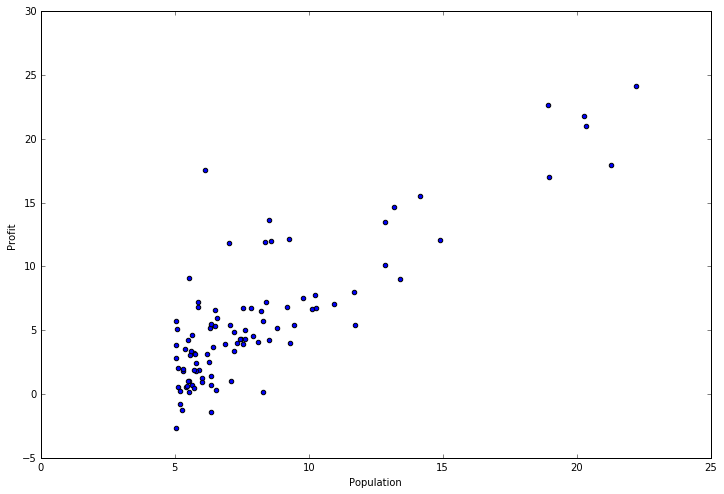

In [68]:
data.plot(x='Population',y='Profit',kind='scatter', figsize=(12,8))

In [69]:
def computeCost(X,y,theta):
    inner = np.power(X * theta.T - y, 2)
    return np.sum(inner) / (2*len(y))

In [70]:

theta = np.matrix(np.array([0.,0.]))
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [71]:
computeCost(X,y,theta)

32.072733877455676

In [72]:
iterations = 1500 
alpha = 0.01

In [73]:
print(theta - alpha * np.sum((X * theta.T - y).T * X, axis =0) / (2*m))

[[ 0.02919568  0.32664425]]


In [84]:
def gradientDescent(X,y,theta,alpha,iterations):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iterations)
    xd = np.zeros(iterations)
    yd = np.zeros(iterations)
    for i in range(iterations):
        temp  -= alpha * np.sum((X * temp.T - y).T * X, axis =0) / m
        cost[i] = computeCost(X,y,temp)
        xd[i] = temp[0,0]
        yd[i] = temp[0,1]
    return temp, cost, xd, yd
        

In [85]:
g, cost, xd, yd = gradientDescent(X,y,theta,alpha,iterations)

In [86]:
g

matrix([[-3.63029144,  1.16636235]])

In [87]:
predict1 = np.matrix(np.array([1,3.5])) * g.T
predict2 = np.matrix(np.array([1,7])) * g.T

In [88]:
predict1, predict2

(matrix([[ 0.45197679]]), matrix([[ 4.53424501]]))

In [89]:
computeCost(X,y,g)

4.4833882565877259

In [90]:
print(theta.ravel().shape[0])

1


In [91]:
x = np.linspace(data.Population.min(), data.Population.max(),100)
f = g[0,0] + (g[0,1] * x)

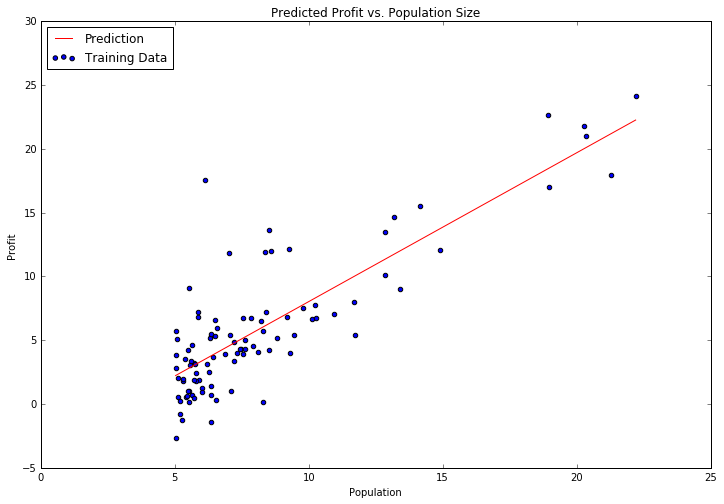

In [92]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r', label = 'Prediction')
ax.scatter(data.Population, data.Profit,c='b', label="Training Data")
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs. Population Size")

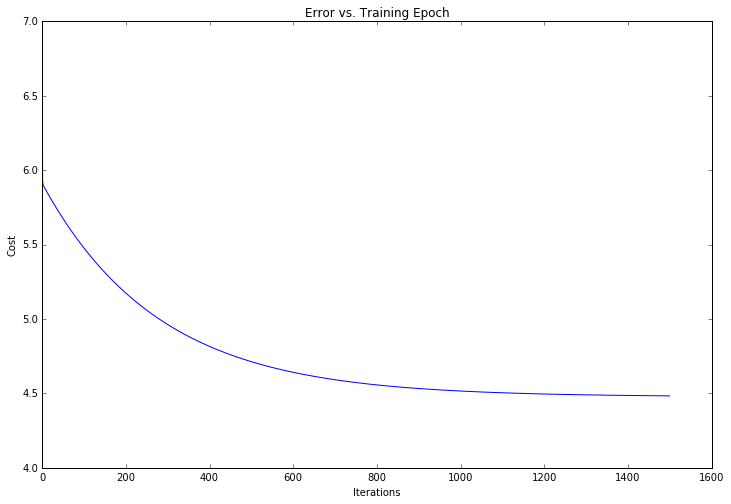

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

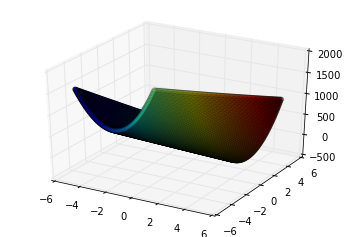

In [107]:
xd = np.zeros((100,100))
yd = np.zeros((100,100))
zd = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        xd[i,j] = (50 - i)/10
        yd[i,j] = (50 - j)/10
        zd[i,j] = computeCost(X,y,np.matrix(np.array([xd[i,j],yd[i,j]])))

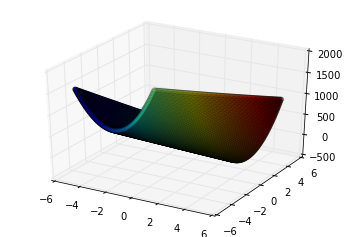

In [108]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xd,yd,zd,c=(xd+yd))